In [2]:
import pandas as pd
import folium
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_white"

In [3]:
pip install folium 

Note: you may need to restart the kernel to use updated packages.


In [4]:
metro_data = pd.read_csv("/kaggle/input/metro-data/Delhi-Metro-Network.csv")

metro_data.head(10)

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,4/6/2008,Elevated,28.675790,77.312390
1,2,Welcome [Conn: Red],46.8,Pink line,10/31/2018,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,11/14/2013,Elevated,28.493600,77.093500
3,4,Okhla NSIC,23.8,Magenta line,12/25/2017,Elevated,28.554483,77.264849
4,5,Dwarka Mor,10.2,Blue line,12/30/2005,Elevated,28.619320,77.033260
5,6,Dilli Haat INA [Conn: Yellow],24.9,Pink line,6/8/2018,Underground,28.574408,77.210241
6,7,Noida Sector 143,11.5,Aqua line,1/25/2019,Elevated,28.502663,77.426256
7,8,Moolchand,15.1,Voilet line,3/10/2010,Elevated,28.564170,77.234230
8,9,Chawri Bazar,15.3,Yellow line,3/7/2005,Underground,28.649310,77.226370
9,10,Maya Puri,12.8,Pink line,3/14/2018,Elevated,28.637179,77.129733


In [5]:
metro_data.tail(5)

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
282,283,Noida Sector 18,43.60,Blue line,12/11/2009,Elevated,28.570810,77.326120
283,284,Knowledge Park II,21.40,Aqua line,1/25/2019,Elevated,28.456867,77.500054
284,285,Mayur Vihar Extention,39.50,Blue line,12/11/2009,Elevated,28.594158,77.294589
285,286,Dhansa Bus stand,3.90,Grey line,9/18/2021,Underground,28.611911,76.978481
286,287,Yashobhoomi Dwarka Sector-25,5.96,Orange line,9/17/2023,Underground,28.552119,77.043469


In [6]:
metro_data.shape

(287, 8)

In [7]:
missing_values = metro_data.isnull().sum()
missing_values

Station ID                  0
Station Name                0
Distance from Start (km)    0
Line                        0
Opening Date                0
Station Layout              0
Latitude                    0
Longitude                   0
dtype: int64

In [8]:
data_types = metro_data.dtypes
data_types

Station ID                    int64
Station Name                 object
Distance from Start (km)    float64
Line                         object
Opening Date                 object
Station Layout               object
Latitude                    float64
Longitude                   float64
dtype: object

In [9]:
print("Basic Information about the Dataset:")
print(metro_data.info())

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Station ID                287 non-null    int64  
 1   Station Name              287 non-null    object 
 2   Distance from Start (km)  287 non-null    float64
 3   Line                      287 non-null    object 
 4   Opening Date              287 non-null    object 
 5   Station Layout            287 non-null    object 
 6   Latitude                  287 non-null    float64
 7   Longitude                 287 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.1+ KB
None


In [10]:
print("\nSummary Statistics for Numerical Columns:")
print(metro_data.describe())


Summary Statistics for Numerical Columns:
       Station ID  Distance from Start (km)    Latitude   Longitude
count  287.000000                287.000000  287.000000  287.000000
mean   144.000000                 19.119373   28.595335   77.029187
std     82.993976                 14.004792    0.091037    2.865330
min      1.000000                  0.000000   27.920862   28.698807
25%     72.500000                  7.200000   28.545943   77.105516
50%    144.000000                 17.300000   28.612304   77.206820
75%    215.500000                 28.700000   28.665528   77.280394
max    287.000000                 52.700000   28.878965   77.554479


In [11]:
df = pd.DataFrame(metro_data)
histogram_fig = px.histogram(df, x='Distance from Start (km)', nbins=10, title='Distribution of Distance from Start (km)')
histogram_fig.show()

In [12]:
df = pd.DataFrame(metro_data)

df['Opening Date'] = pd.to_datetime(df['Opening Date'])

line_fig = px.line(df, x='Station ID', y='Opening Date', title='Trend of Opening Dates of Stations',
                   color_discrete_sequence=['skyblue'])

fig_pie = px.pie(df, 
                 names='Station Layout', 
                 title='Station Layout Distribution', 
                 template='plotly_white')

fig_pie.update_traces(marker=dict(colors=['#ffcccb', '#add8e6']), textinfo='percent+label')

box_fig = px.box(df, x='Line', y='Distance from Start (km)', title='Distribution of Distances from Start for Each Line')

scatter_fig = px.scatter(df, x='Longitude', y='Latitude', color='Line', hover_data=['Station Name'],
                         title='Metro Stations by Latitude and Longitude')

line_counts = df['Line'].value_counts().reset_index()
line_counts.columns = ['Line', 'Count']

fig = px.pie(line_counts, values='Count', names='Line', title='Distribution of Metro Lines')
fig.show()

line_fig.show()
box_fig.show()
scatter_fig.show()
fig_pie.show()

In [13]:
metro_data['Opening Date'] = pd.to_datetime(metro_data['Opening Date'])

In [14]:
line_colors = {
    'Red line': 'red',
    'Blue line': 'blue',
    'Yellow line': 'beige',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'darkred',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'black',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'lightblue',
    'Gray line': 'lightgray'
}

In [15]:
delhi_map_with_line_tooltip = folium.Map(location=[28.7041, 77.1025], zoom_start=11)

In [16]:
for index, row in metro_data.iterrows():
    line = row['Line']
    color = line_colors.get(line, 'black') 
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Station Name']}",
        tooltip=f"{row['Station Name']}, {line}",
        icon=folium.Icon(color=color)
      ).add_to(delhi_map_with_line_tooltip)

In [17]:
delhi_map_with_line_tooltip

In [18]:
metro_data['Opening Year'] = metro_data['Opening Date'].dt.year

In [19]:

stations_per_year = metro_data['Opening Year'].value_counts().sort_index()

In [20]:
stations_per_year_df = stations_per_year.reset_index()
stations_per_year_df.columns = ['Year', 'Number of Stations']

In [21]:
fig = px.bar(stations_per_year_df,x='Year',y='Number of Stations',
             title="Number of Metro Stations Opened Each Year in Delhi",
             labels={'Number of Stations':'Number of Stations Opened'},
             text_auto = False,
             color='Year'
             )

fig.update_layout(xaxis_tickangle = -60,xaxis = dict(tickmode='linear'))
fig.update_layout(width=1400,height=600)

fig.show()

In [22]:
stations_per_line = metro_data['Line'].value_counts()
total_distance_per_line = metro_data.groupby('Line')['Distance from Start (km)'].max()

avg_distance_per_line = total_distance_per_line / (stations_per_line - 1)

line_analysis = pd.DataFrame({
    'Line': stations_per_line.index,
    'Number of Stations': stations_per_line.values,
    'Average Distance Between Stations (km)': avg_distance_per_line
})
line_analysis = line_analysis.sort_values(by='Number of Stations', ascending=False)

line_analysis.reset_index(drop=True, inplace=True)
print(line_analysis)


                 Line  Number of Stations  \
0           Blue line                  49   
1           Pink line                  38   
2         Yellow line                  37   
3         Voilet line                  34   
4            Red line                  29   
5        Magenta line                  25   
6           Aqua line                  21   
7          Green line                  21   
8         Rapid Metro                  11   
9    Blue line branch                   8   
10        Orange line                   7   
11          Gray line                   3   
12  Green line branch                   3   
13          Grey line                   1   

    Average Distance Between Stations (km)  
0                                 1.355000  
1                                 1.097917  
2                                 1.157143  
3                                 1.950000  
4                                 1.240000  
5                                 1.050000  
6        

In [23]:
fig = make_subplots(rows=1,cols=2,subplot_titles=('Number of Stations Per Metro Line',
                                                  'Average Distance Between Stations Per Metro Line (km)'),
                                                  horizontal_spacing=0.2)

fig.add_trace(
    go.Bar(y=line_analysis['Line'],x=line_analysis['Number of Stations'],
           orientation='h',name='Number Of Stations',marker_color='purple'),
           row=1,col=1)

fig.add_trace(
    go.Bar(y=line_analysis['Line'],x=line_analysis['Average Distance Between Stations (km)'],
           orientation='h',name='Average Distance (km)',marker_color='olive'),
           row=1,col=2)

fig.update_xaxes(title_text="Number of Stations", row=1, col=1)
fig.update_xaxes(title_text="Average Distance Between Stations (km)", row=1, col=2)

fig.update_yaxes(title_text="Metro Line",row=1,col=1)
fig.update_layout(height=600,width=1400,title_text='Metro Line Analysis')

fig.show()

In [24]:
layout_counts = metro_data['Station Layout'].value_counts()
fig = px.bar(x=layout_counts.index, y=layout_counts.values,
             labels={'x': 'Station Layout', 'y': 'Number of Stations'},
             title='Distribution of Delhi Metro Station Layouts',
             color=layout_counts.index,
             color_continuous_scale='pastel')

In [25]:
fig.update_layout(xaxis_title="Station Layout",
                  yaxis_title="Number of Stations",
                  coloraxis_showscale=False,
                  template="plotly_white")

fig.show()

# NOW OPTIMIZING THE ROUTES


In [3]:
import pandas as pd
agency = pd.read_csv('/kaggle/input/metrotrain-optimization/agency.txt')
calendar = pd.read_csv('/kaggle/input/metrotrain-optimization/calendar.txt')
routes = pd.read_csv('/kaggle/input/metrotrain-optimization/routes.txt')
shapes = pd.read_csv('/kaggle/input/metrotrain-optimization/shapes.txt')
stop_times = pd.read_csv('/kaggle/input/metrotrain-optimization/stop_times.txt')
stops = pd.read_csv('/kaggle/input/metrotrain-optimization/stops.txt')
trips = pd.read_csv('/kaggle/input/metrotrain-optimization/trips.txt')
data_overviews = {
    "agency": agency.head(),
    "calendar": calendar.head(),
    "routes": routes.head(),
    "shapes": shapes.head(),
    "stop_times": stop_times.head(),
    "stops": stops.head(),
    "trips": trips.head()
}

data_overviews


{'agency':   agency_id                   agency_name                      agency_url  \
 0      DMRC  Delhi Metro Rail Corporation  http://www.delhimetrorail.com/   
 
   agency_timezone  agency_lang  agency_phone  agency_fare_url  agency_email  
 0    Asia/Kolkata          NaN           NaN              NaN           NaN  ,
 'calendar':   service_id  monday  tuesday  wednesday  thursday  friday  saturday  sunday  \
 0    weekday       1        1          1         1       1         0       0   
 1   saturday       0        0          0         0       0         1       0   
 2     sunday       0        0          0         0       0         0       1   
 
    start_date  end_date  
 0    20190101  20251231  
 1    20190101  20251231  
 2    20190101  20251231  ,
 'routes':    route_id  agency_id route_short_name  \
 0        33        NaN           R_SP_R   
 1        31        NaN           G_DD_R   
 2        29        NaN           P_MS_R   
 3        12        NaN             M_JB

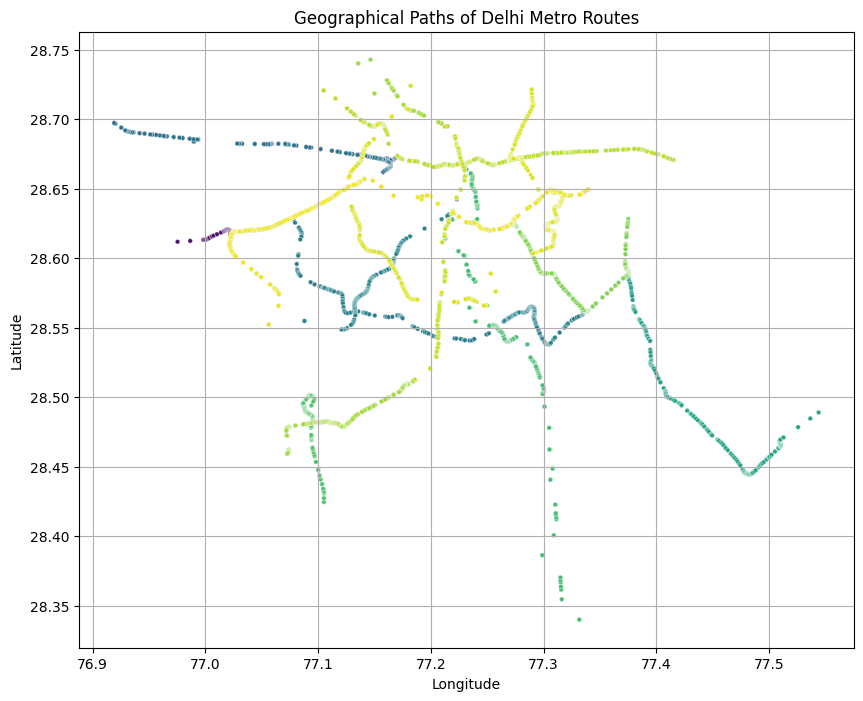

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='shape_pt_lon', y='shape_pt_lat', hue='shape_id', data=shapes, palette='viridis', s=10, legend=None)
plt.title('Geographical Paths of Delhi Metro Routes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

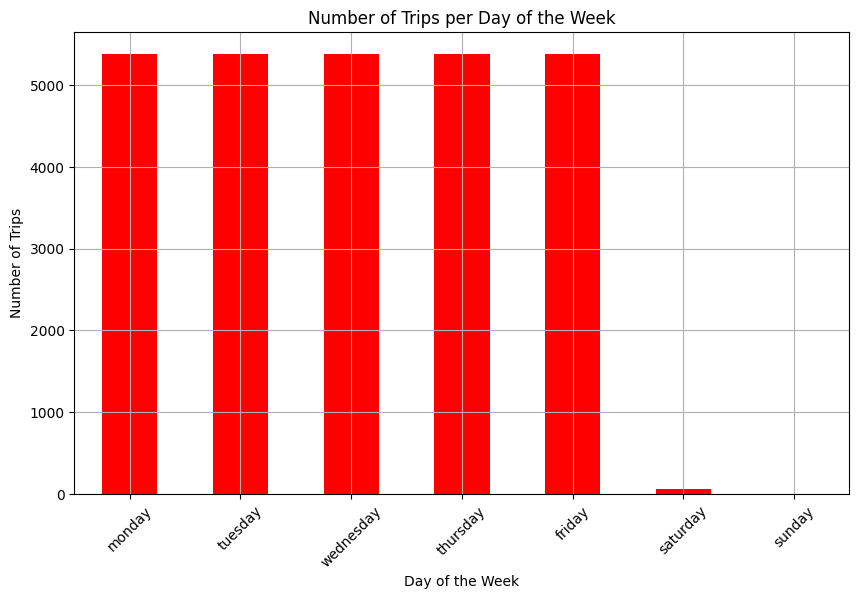

In [5]:
# merge trips with calendar to include the day of operation information
trips_calendar = pd.merge(trips, calendar, on='service_id', how='left')

# count the number of trips per day of the week
trip_counts = trips_calendar[['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']].sum()

# Plotting
plt.figure(figsize=(10, 6))
trip_counts.plot(kind='bar', color='red')
plt.title('Number of Trips per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

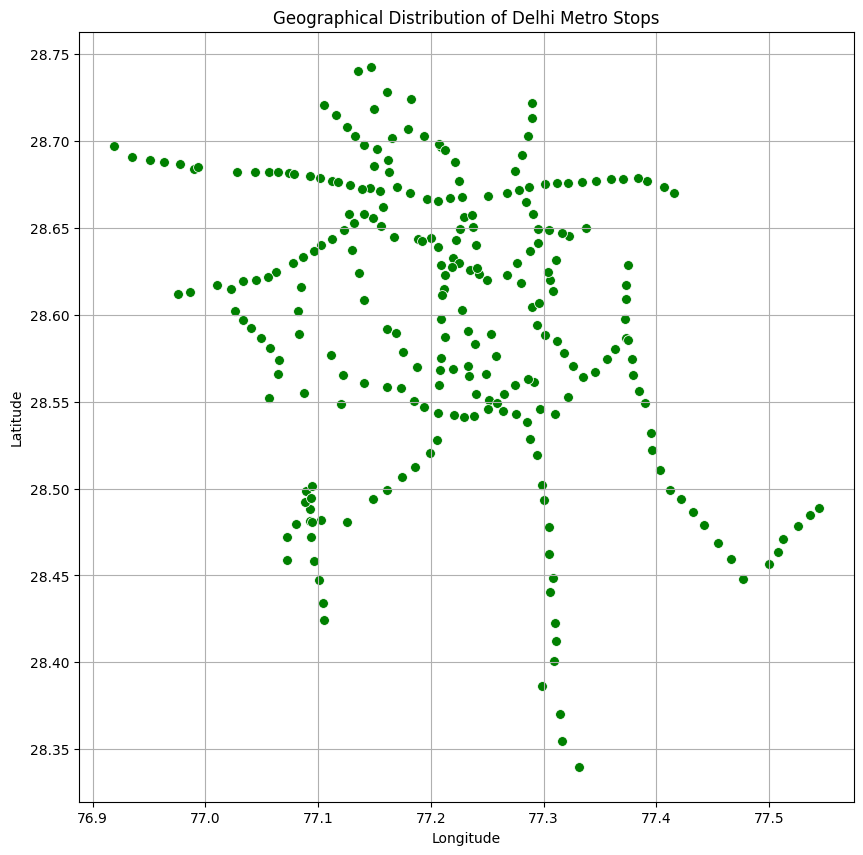

In [6]:
# plotting the locations of the stops
plt.figure(figsize=(10, 10))
sns.scatterplot(x='stop_lon', y='stop_lat', data=stops, color='green', s=50, marker='o')
plt.title('Geographical Distribution of Delhi Metro Stops')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

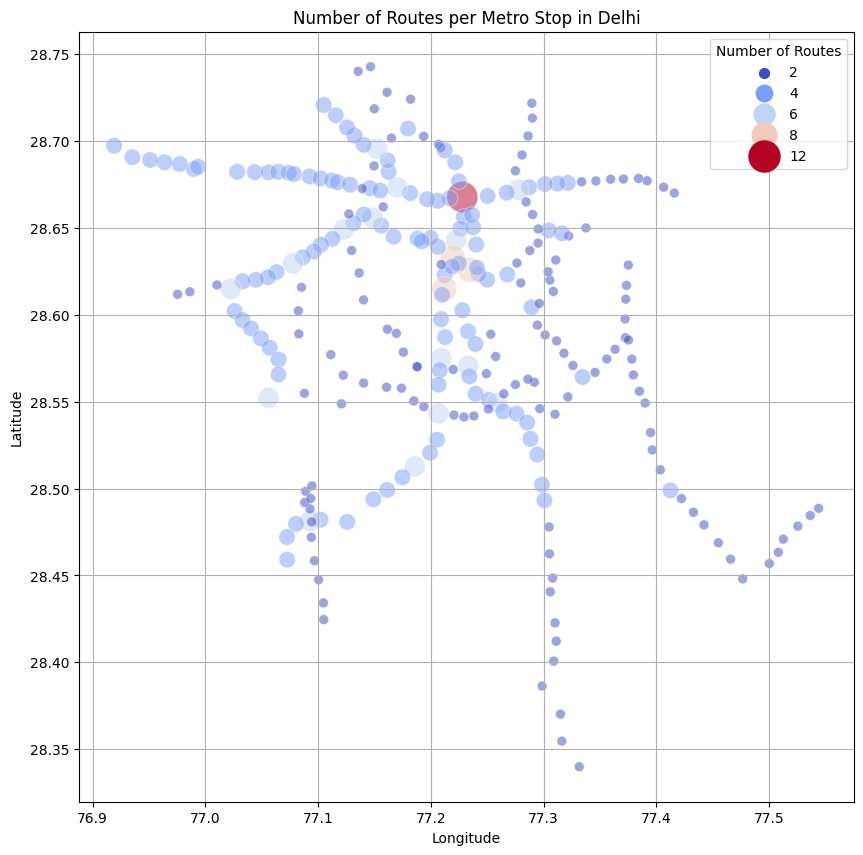

In [7]:

stops_with_routes = pd.merge(pd.merge(stop_times, trips, on='trip_id'), routes, on='route_id')
stop_route_counts = stops_with_routes.groupby('stop_id')['route_id'].nunique().reset_index()
stop_route_counts = stop_route_counts.rename(columns={'route_id': 'number_of_routes'})
stop_route_counts = pd.merge(stop_route_counts, stops, on='stop_id')
plt.figure(figsize=(10, 10))
sns.scatterplot(x='stop_lon', y='stop_lat', size='number_of_routes', hue='number_of_routes',
                sizes=(50, 500), alpha=0.5, palette='coolwarm', data=stop_route_counts)
plt.title('Number of Routes per Metro Stop in Delhi')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Number of Routes')
plt.grid(True)
plt.show()

/tmp/ipykernel_37/1767742519.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_times_intervals['part_of_day'] = stop_times_intervals['arrival_time_dt'].apply(part_of_day)


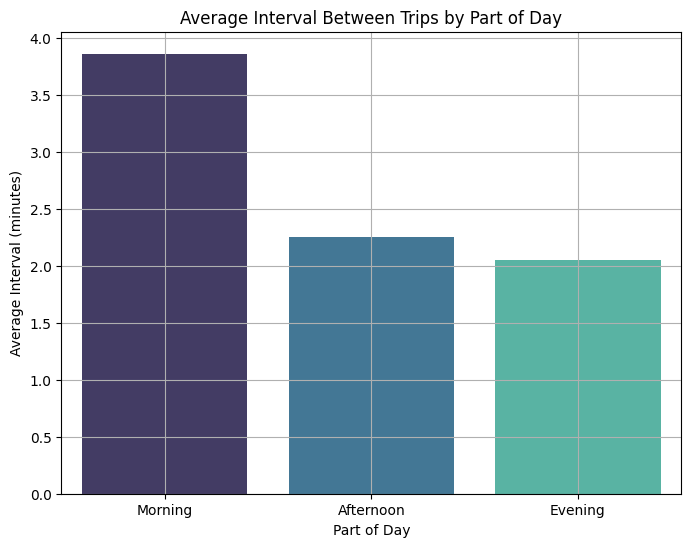

In [8]:
import datetime as dt
def convert_to_time(time_str):
    try:
        return dt.datetime.strptime(time_str, '%H:%M:%S').time()
    except ValueError:
        
        hour, minute, second = map(int, time_str.split(':'))
        return dt.time(hour % 24, minute, second)

stop_times['arrival_time_dt'] = stop_times['arrival_time'].apply(convert_to_time)

stop_times_sorted = stop_times.sort_values(by=['stop_id', 'arrival_time_dt'])
stop_times_sorted['next_arrival_time'] = stop_times_sorted.groupby('stop_id')['arrival_time_dt'].shift(-1)


def time_difference(time1, time2):
    if pd.isna(time1) or pd.isna(time2):
        return None
    full_date_time1 = dt.datetime.combine(dt.date.today(), time1)
    full_date_time2 = dt.datetime.combine(dt.date.today(), time2)
    return (full_date_time2 - full_date_time1).seconds / 60

stop_times_sorted['interval_minutes'] = stop_times_sorted.apply(lambda row: time_difference(row['arrival_time_dt'], row['next_arrival_time']), axis=1)

stop_times_intervals = stop_times_sorted.dropna(subset=['interval_minutes'])


def part_of_day(time):
    if time < dt.time(12, 0):
        return 'Morning'
    elif time < dt.time(17, 0):
        return 'Afternoon'
    else:
        return 'Evening'

stop_times_intervals['part_of_day'] = stop_times_intervals['arrival_time_dt'].apply(part_of_day)
average_intervals = stop_times_intervals.groupby('part_of_day')['interval_minutes'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='part_of_day', y='interval_minutes', data=average_intervals, order=['Morning', 'Afternoon', 'Evening'], palette='mako')
plt.title('Average Interval Between Trips by Part of Day')
plt.xlabel('Part of Day')
plt.ylabel('Average Interval (minutes)')
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


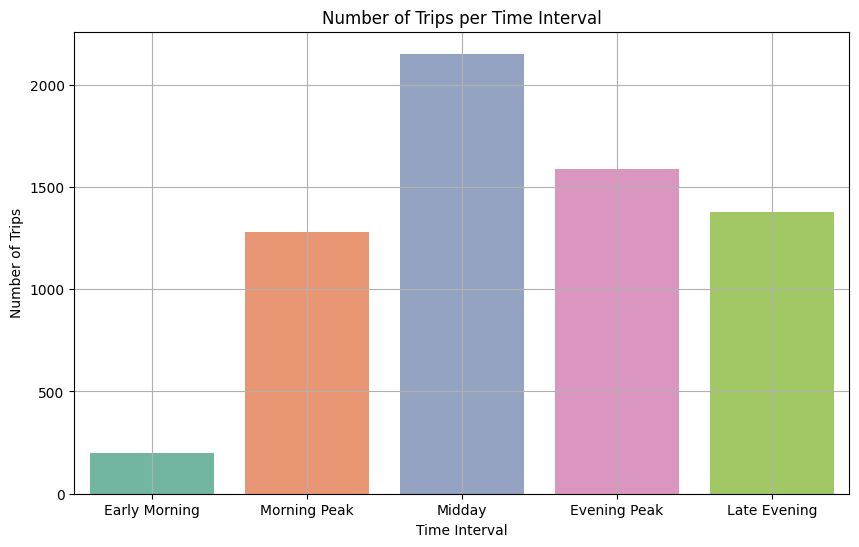

In [9]:
def classify_time_interval(time):
    if time < dt.time(6, 0):
        return 'Early Morning'
    elif time < dt.time(10, 0):
        return 'Morning Peak'
    elif time < dt.time(16, 0):
        return 'Midday'
    elif time < dt.time(20, 0):
        return 'Evening Peak'
    else:
        return 'Late Evening'


stop_times['time_interval'] = stop_times['arrival_time_dt'].apply(classify_time_interval)


trips_per_interval = stop_times.groupby('time_interval')['trip_id'].nunique().reset_index()
trips_per_interval = trips_per_interval.rename(columns={'trip_id': 'number_of_trips'})

ordered_intervals = ['Early Morning', 'Morning Peak', 'Midday', 'Evening Peak', 'Late Evening']
trips_per_interval['time_interval'] = pd.Categorical(trips_per_interval['time_interval'], categories=ordered_intervals, ordered=True)
trips_per_interval = trips_per_interval.sort_values('time_interval')

plt.figure(figsize=(10, 6))
sns.barplot(x='time_interval', y='number_of_trips', data=trips_per_interval, palette='Set2')
plt.title('Number of Trips per Time Interval')
plt.xlabel('Time Interval')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

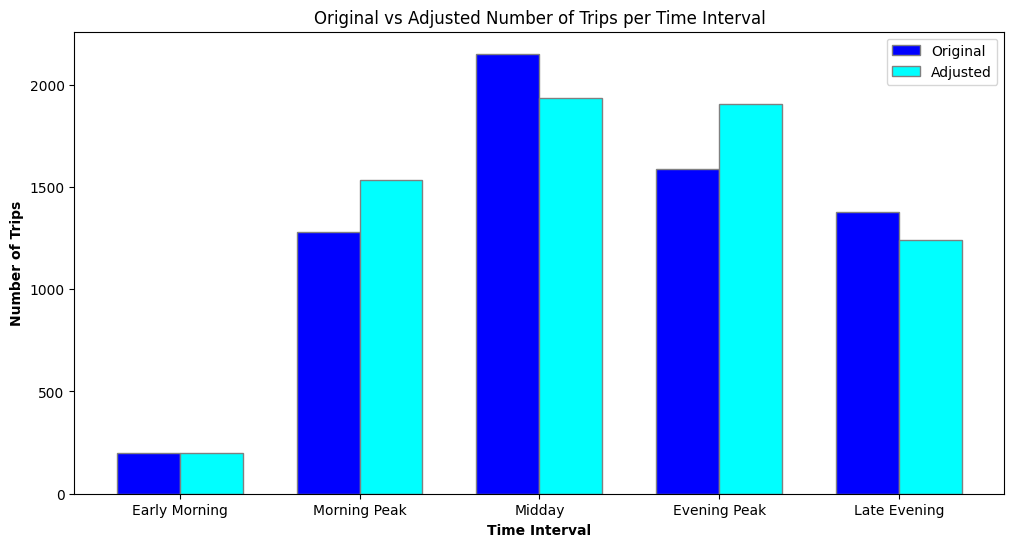

In [10]:
adjusted_trips_per_interval = trips_per_interval.copy()
adjustment_factors = {'Morning Peak': 1.20, 'Evening Peak': 1.20, 'Midday': 0.90, 'Early Morning': 1.0, 'Late Evening': 0.90}


adjusted_trips_per_interval['adjusted_number_of_trips'] = adjusted_trips_per_interval.apply(
    lambda row: int(row['number_of_trips'] * adjustment_factors[row['time_interval']]), axis=1)
plt.figure(figsize=(12, 6))
bar_width = 0.35
r1 = range(len(adjusted_trips_per_interval))
r2 = [x + bar_width for x in r1]

plt.bar(r1, adjusted_trips_per_interval['number_of_trips'], color='blue', width=bar_width, edgecolor='grey', label='Original')
plt.bar(r2, adjusted_trips_per_interval['adjusted_number_of_trips'], color='cyan', width=bar_width, edgecolor='grey', label='Adjusted')

plt.xlabel('Time Interval', fontweight='bold')
plt.ylabel('Number of Trips', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(adjusted_trips_per_interval))], adjusted_trips_per_interval['time_interval'])
plt.title('Original vs Adjusted Number of Trips per Time Interval')
plt.legend()

plt.show()

# THANKS 